參考講義：
- https://ntpuccw.blog/python-in-learning/lesson-7-root-finding-and-minimization-of-unit-variate-function/
- https://ntpuccw.blog/python-in-learning/lesson-8-minimization-of-multivariate-function/

<hr>

<font color=skyblue>單變量函數的繪製與最小值計算</font>

$$f(x) = x^4 - 8x^3 + 16x^2 - 2x + 8$$
$$\min_{x} f(x)$$

<font color=yellow>Use scipy.optimize.minimize</font>

      fun: -0.06065979341822292
 hess_inv: array([[0.02812903]])
      jac: array([-0.00038457])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([4.05978098])
Minimum found at x = 4.0598, f(x) = -0.0607


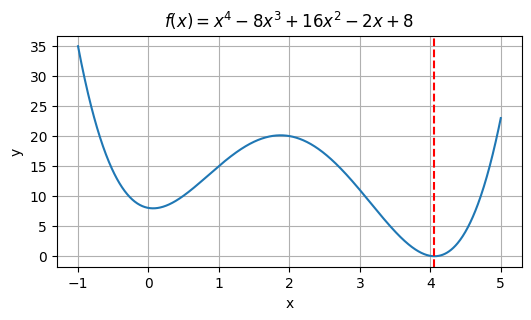

Grid Search: Minimum at x = 4.057057, f(x) = -0.0605


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# plot a polynomial function
x = np.linspace(-1, 5, 1000) # 1000 points from -1 to 5
# use coefficients to define the polynomial
coefficients = [1, -8, 16, -2, 8] # coefficients of the polynomial
# y = x**4 - 8*x**3 + 16*x**2 - 2*x + 8
f = lambda x: np.polyval(coefficients, x) # the inline function
y = f(x) # evaluate the function

x0 = 2 # initial guess; use different initial guesses to see different results
res = minimize(f, x0=x0, method='BFGS', tol=1e-6) # initial guess x0=0
# print(res)
# print the minimum with 4 decimal places
print(f'Minimum found at x = {float(res.x):.4f}, f(x) = {float(res.fun):.4f}')

fig = plt.figure(figsize=(6, 3))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x) = x^4 - 8x^3 + 16x^2 - 2x + 8$')
plt.grid()
# add verticle line at the minimum of the function
min_x = x[np.argmin(y)]
plt.axvline(x=min_x, color='r', linestyle='--')
plt.show()
# print the minimum with 4 decimal places
print(f'Grid Search: Minimum at x = {min_x:4f}, f(x) = {y[np.argmin(y)]:.4f}')

<font color=yellow>Use scipy.optimize.minimize_scalar</font>

Minimum found at x = 4.0598, f(x) = -0.0607


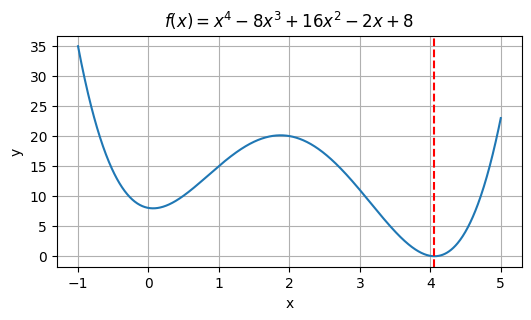

Grid Search: Minimum at x = 4.057057, f(x) = -0.0605


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# plot a polynomial function
x = np.linspace(-1, 5, 1000) # 1000 points from -1 to 5
# use coefficients to define the polynomial
coefficients = [1, -8, 16, -2, 8] # coefficients of the polynomial
# y = x**4 - 8*x**3 + 16*x**2 - 2*x + 8
f = lambda x: np.polyval(coefficients, x) # the inline function
y = f(x) # evaluate the function

res = minimize_scalar(f, bracket=[2, 3, 5], method='brent') # use bracket method
# res = minimize_scalar(f, bounds=(-1, 5), method='bounded', \
#                     options={'maxiter': 1000, 'xatol': 1e-5})
# print(res)
# print the minimum with 4 decimal places
print(f'Minimum found at x = {res.x:.4f}, f(x) = {res.fun:.4f}')

fig = plt.figure(figsize=(6, 3))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x) = x^4 - 8x^3 + 16x^2 - 2x + 8$')
plt.grid()
# add verticle line at the minimum of the function
min_x = x[np.argmin(y)]
plt.axvline(x=min_x, color='r', linestyle='--')
plt.show()
# print the minimum with 4 decimal places
print(f'Grid Search: Minimum at x = {min_x:4f}, f(x) = {y[np.argmin(y)]:.4f}')

<hr>

<font color=yellow>計算函數的區域最大值</font>

$$\displaystyle \max_{0 \leq \theta \leq 3\pi} V(\theta)$$

where 
$$V(\theta)=\frac{\pi}{3}(\frac{10\pi - 5\theta}{2\pi})^2\sqrt{25 - (\frac{10\pi - 5\theta}{2\pi})^2}$$


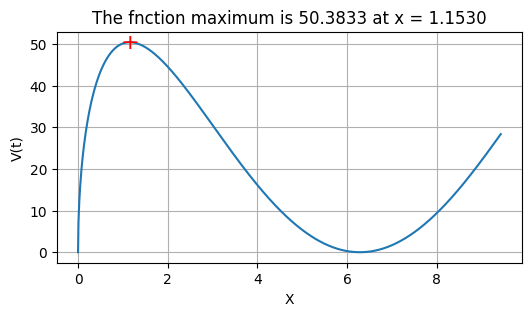

In [11]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
 
# define a function for a complicated funcion
def V(t) :
    tmp = ((10*np.pi - 5*t) / (2*np.pi))**2
    V = np.pi / 3 * tmp * np.sqrt(25 - tmp)
    return -V # return negative for maximization
 
t = np.linspace(0, 3*np.pi, 1000)
fig = plt.figure(figsize=(6, 3))
plt.plot(t, -V(t))
 
res = opt.minimize_scalar(V, bounds = [0, 2])
 
plt.text(res.x, -res.fun, '+', color ='r', fontsize = 16,
    horizontalalignment='center',
    verticalalignment='center') # mark the maximum point
plt.ylabel('V(t)'),
plt.xlabel('X'), plt.grid(True)
plt.title('The fnction maximum is {:.4f} at x = {:.4f}'.format(-res.fun, res.x))
plt.show()

<hr>
<font color=skyblue>雙變量函數的繪製與最小值計算</font>


- 繪製函數 $f(x,y) = xe^{-x^2-y^2}$ 的立體網格圖（mesh(wireframe), surface)  與等高線圖(contour, contourf)
  
  $$f(x,y) = xe^{-x^2-y^2}$$
  
  where $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$

- 計算函數 $f(x,y)$ 的最小值，即
  $$\min_{x,y} f(x,y)$$
  

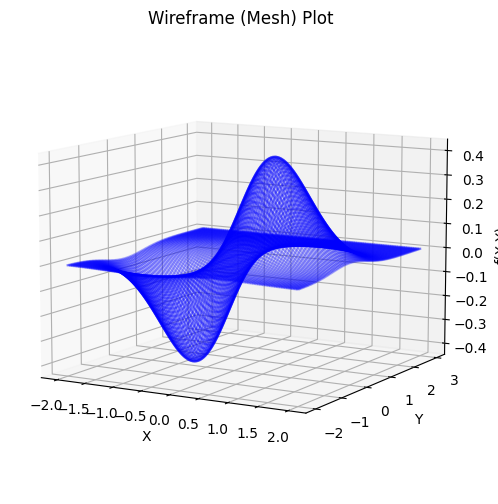

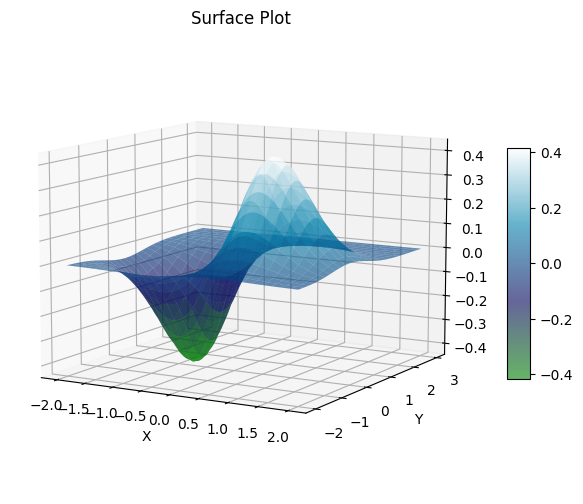

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# define the function
f = lambda x : x[0] * np.exp(-x[0]**2 - x[1]**2)
# create a mesh grid 
n = 100
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 3, n)
X, Y = np.meshgrid(x, y) # mesh grid matric
Z = f([X, Y]) # evaluate the function on the grid
 
# for wireframe, control the wire density by rstride and cstride
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, Z, color ='blue',
    alpha=0.3, rstride = 1, cstride = 1) # rstride=4, cstride=4
ax.set_xlabel('X'), ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
# set the view angle
ax.view_init(10, -60)  #(elev=-165, azim=60)
plt.title('Wireframe (Mesh) Plot')
plt.show()
 
# for surface 3D plot
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X, Y, Z, color = 'r', \
    rstride=4, cstride=4, alpha =0.6, cmap='ocean') # cmap = plt.cm.bone
 # cmap = plt.cm.bone
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10) # aspect = length/width ratio
ax.view_init(10, -60)  #(elev=-165, azim=60)
ax.set_xlabel('X'), ax.set_ylabel('Y')
plt.title('Surface Plot')
plt.show()

<font color=yellow>繪製等高線圖</font>

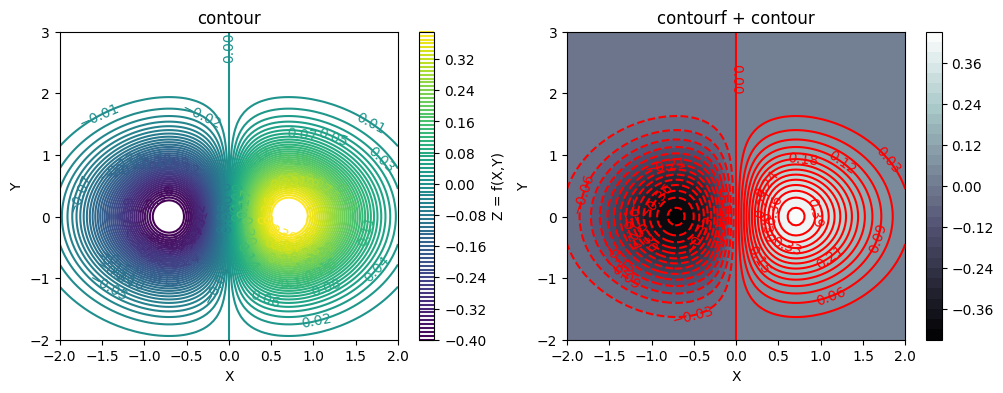

In [24]:
# 根據 f(x,y) 的範圍設定恰當的等高線位置
levels = np.arange(-0.4, 0.4, 0.01) # levels of contour lines

fig, ax = plt.subplots(1,2, figsize=(12, 4))
contours = ax[0].contour(X, Y, Z, levels=levels) # check dir(contours)
# add function value on each line    
ax[0].clabel(contours, inline = 0, fontsize = 10) # inline =1 or 0 
cbar = fig.colorbar(contours, ax=ax[0]) # add colorbar
ax[0].set_xlabel('X'), ax[0].set_ylabel('Y')
cbar.ax.set_ylabel('Z = f(X,Y)') # set colorbar label
ax[0].set_title('contour')
# draw a contour plot with contourf
C1 = ax[1].contourf(X, Y, Z, 30, cmap = plt.cm.bone)
C2 = ax[1].contour(C1, levels = C1.levels, colors = 'r') # check dir(contours)
fig.colorbar(C1, ax=ax[1])
ax[1].set_xlabel('X'), ax[1].set_ylabel('Y')
ax[1].set_title('contourf + contour')  
ax[1].clabel(C2, inline = 0, fontsize = 10) # inline =1 or 0 
plt.show()

<font color=yellow>計算多變量函數之最小值`(use scipy.optimize.fmin)`</font>

$$\displaystyle\min_{x, y} xe^{-x^2-y^2}$$


In [25]:
import numpy as np
import scipy.optimize as opt
 
f = lambda x : x[0] * np.exp(-x[0]**2 - x[1]**2)
x0 = [0, -1] # initial guess
# OptVal = opt.fmin(func = f, x0 = x0, maxiter = 1e3, \
                  # maxfun = 1e3, disp = False, full_output = True)
# Use a dictionary to express algorithmic parameters
opts = dict(disp = 1, xtol = 1e-6, ftol = 1e-6, maxfun = 1e4, \
            maxiter = 1e4, full_output = True)
OptVal = opt.fmin(func = f, x0=x0, **opts)

print('The minimum occurrs at x = {:.4f}, \
      y = {:.4f}'.format(OptVal[0][0], OptVal[0][1]))
print('The function vaule is {:.4f}'.format(OptVal[1]))

Optimization terminated successfully.
         Current function value: -0.428882
         Iterations: 73
         Function evaluations: 135
The minimum occurrs at x = -0.7071,       y = 0.0000
The function vaule is -0.4289


<font color=yellow>在等高線圖標示函數最小值的位置</font>

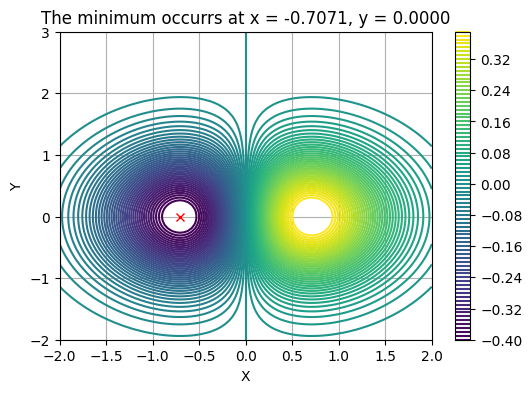

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# define the function
f = lambda x : x[0] * np.exp(-x[0]**2 - x[1]**2)
x0 = [0, -1] # initial guess
OptVal = opt.fmin(func = f, x0 = x0, maxiter = 1e3, \
                  maxfun = 1e3, disp = False, full_output = True)
# create a mesh grid 
n = 100
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 3, n)
X, Y = np.meshgrid(x, y) # mesh grid matric
Z = f([X, Y]) # evaluate the function on the grid

# for contour plot
levels = np.arange(-0.4, 0.4, 0.01) # levels of contour lines
fig, ax = plt.subplots(1,1, figsize=(6, 4))
CS = ax.contour(X, Y, Z, levels = levels) # check dir(contours)
# add function value on each line    
# ax.clabel(CS, inline = 0, fontsize = 10) # inline =1 or 0 
cbar = fig.colorbar(CS) # add colorbar
ax.set_xlabel('X'), ax.set_ylabel('Y')
# set grid
ax.grid(True)
# cbar.ax.set_ylabel('Z = f(X,Y)') # set colorbar label
# ax.set_title('contour')
# mark the minimum point
# repprt the minimum point in title
ax.set_title('The minimum occurrs at x = {:.4f}, y = {:.4f}'.format(OptVal[0][0], OptVal[0][1]))
plt.plot(OptVal[0][0], OptVal[0][1], 'rx')
plt.show()